In [1]:
import pandas as pd
import numpy as np

import tqdm
import os, sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import utils

In [2]:
# Load data
data_folder = "/home/ds.ccrg.kadooriecentre.org/henrique.aguiar/Desktop/COPD/data/processed/"
times_cols  = ["event_time", "hadm_start_time", "hadm_end_time", "charttime"]

# import vital signs
data_all    = pd.read_csv(data_folder + "VLS_process.csv", parse_dates = times_cols)
data_copd   = pd.read_csv(data_folder + "COPD_VLS_process.csv", parse_dates = times_cols)

# import cohort
cohort_all  = pd.read_csv(data_folder + "Cohort.csv", index_col = 0)
cohort_copd = cohort_all.loc[data_copd.subject_id.unique()]

# import outcomes
outcomes_all  = pd.read_csv(data_folder + "all_outcomes.csv", index_col = 0)
outcomes_copd = pd.read_csv(data_folder + "copd_outcomes.csv", index_col = 0)

# check
def check_loading():
    
    assert (cohort_copd.index == data_copd.subject_id.unique()).all()
    assert (cohort_all.index == data_all.subject_id.unique()).all()
    
    assert (outcomes_copd.index == data_copd.subject_id.unique()).all()
    assert (outcomes_all.index == data_all.subject_id.unique()).all()
    
    assert outcomes_all.eq(1).sum(axis = 1).eq(1).all()
    assert outcomes_copd.eq(1).sum(axis = 1).eq(1).all()
    
    assert cohort_all.index.is_monotonic
    assert cohort_copd.index.is_monotonic
    
    assert outcomes_all.index.is_monotonic
    assert outcomes_copd.index.is_monotonic
    
    
# check conditions
if __name__ == "__main__":
    check_loading()
    


# Data distribution (without focus per outcome at the moment)

In [3]:
save_vis_folder = "/home/ds.ccrg.kadooriecentre.org/henrique.aguiar/Desktop/COPD/attention-project/visualisations/data/"

### Static variables and per outcome


In [54]:
static_info = utils.print_static_summary(cohort_all)
static_info.to_csv(save_vis_folder + "cohort_all.csv", index = True)

In [67]:
static_info_per_outcomes = utils.print_static_summary_by_outcome(cohort_all, outcomes_all)
static_info_per_outcomes.to_csv(save_vis_folder + "cohort_all_per_outcome.csv", index = True)

In [69]:
static_info_copd = utils.print_static_summary(cohort_copd)
static_info_copd.to_csv(save_vis_folder + "cohort_copd.csv", index = True)

In [70]:
static_info_copd_per_outcomes = utils.print_static_summary_by_outcome(cohort_copd, outcomes_copd)
static_info_copd_per_outcomes.to_csv(save_vis_folder + "cohort_copd_per_outcome.csv", index = True)

### Print Length of stay information 

In [155]:
log_los_tbl      = utils.compute_LOS_by_outcome(data_all, log_scale = True)
log_los_copd_tbl = utils.compute_LOS_by_outcome(data_copd, log_scale = True)

<ipython-input-163-f7121f5409b1>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


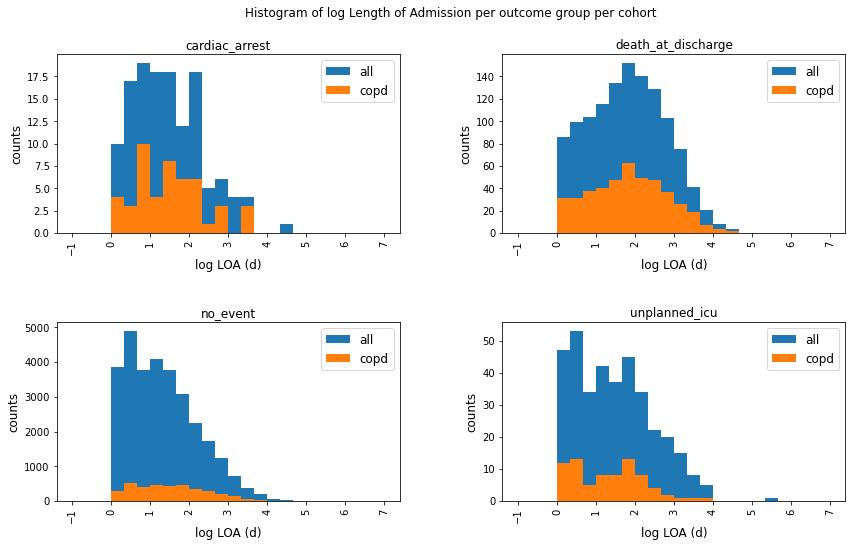

In [163]:
# Plot Log length of stay
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (13.69, 8.27))

# Compute bin sizes
bins = np.arange(-1, int(np.ceil(log_los_tbl["los (d)"].max())) + 1, step = 0.333)
                   
# Plot histograms
log_los_tbl.hist(column = "los (d)", by = "event_type", ax = ax, sharex = True, bins = bins, 
                 label = "all")
log_los_copd_tbl.hist(column = "los (d)", by = "event_type", ax = ax, sharex = True, bins = bins,
                      label = "copd")
for ax_ in ax.reshape(-1):
    ax_.legend(fontsize = 12)
    ax_.set_xlabel("log LOA (d)", fontsize = 12)
    ax_.set_ylabel("counts", fontsize = 12)
    
fig.suptitle("Histogram of log Length of Admission per outcome group per cohort", fontsize = 12)
fig.show()

plt.savefig(save_vis_folder + "LOS_per_outcome_per_cohort.png", facecolor = "white")

<ipython-input-161-a312a7f67e48>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


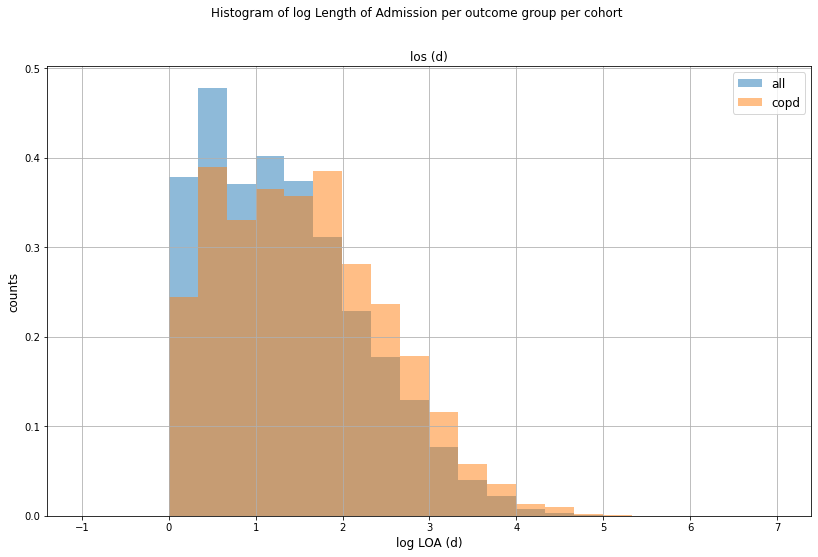

In [161]:
# Plot Log length of stay
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13.69, 8.27))

# Compute bin sizes
bins = np.arange(-1, int(np.ceil(log_los_tbl["los (d)"].max())) + 1, step = 0.333)
                   
# Plot histograms
log_los_tbl.hist(column = "los (d)",  ax = ax, sharex = True, bins = bins, density = True, alpha = 0.5,
                 label = "all")
log_los_copd_tbl.hist(column = "los (d)", ax = ax, sharex = True, bins = bins, density = True, alpha = 0.5,
                      label = "copd")

# add pretty ness
ax.legend(fontsize = 12)
ax.set_xlabel("log LOA (d)", fontsize = 12)
ax.set_ylabel("counts", fontsize = 12)
    
fig.suptitle("Histogram of log Length of Admission per outcome group per cohort", fontsize = 12)
fig.show()

plt.savefig(save_vis_folder + "LOS_per_cohort.png", facecolor = "white")

### Plot other variable distributions

In [4]:
vital_signs = ['HR', 'RR', 'SBP', 'DBP', 'SPO2', 'FIO2', 'TEMP', 'AVPU']
biochem_feat= ['ALB', 'CR', 'CRP', 'POT', 'SOD', 'UR']
serum_feat  = ['HGB', 'WBC', 'BAS', 'EOS', 'LYM', 'NEU', 'EBR', 'NLR']

#### Plot observation distributions

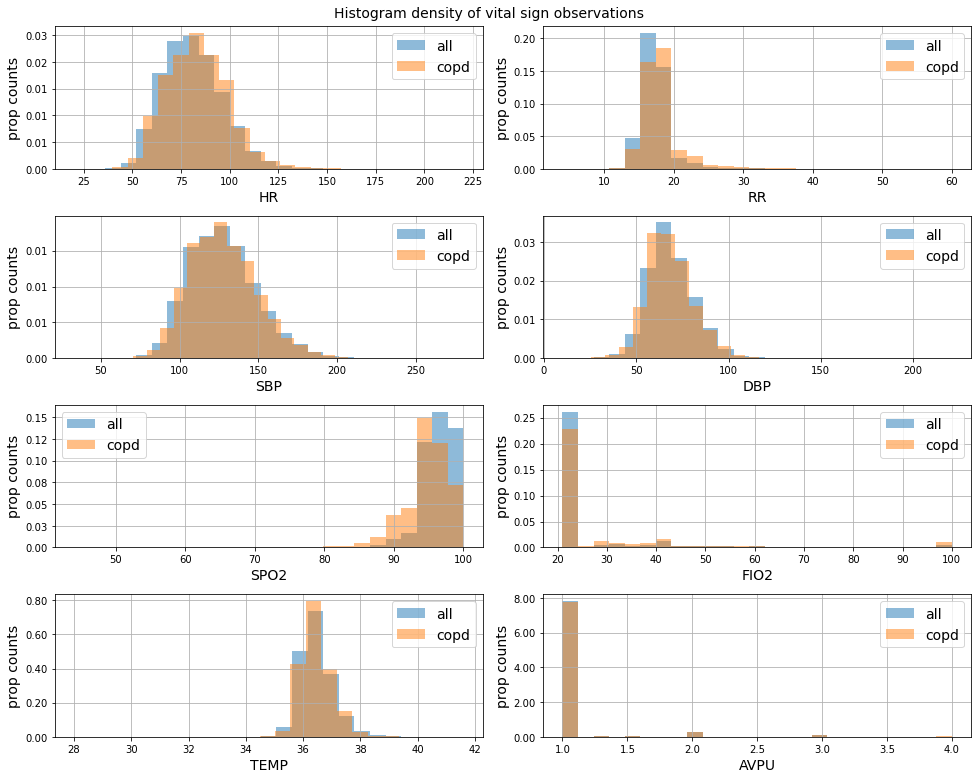

<Figure size 432x288 with 0 Axes>

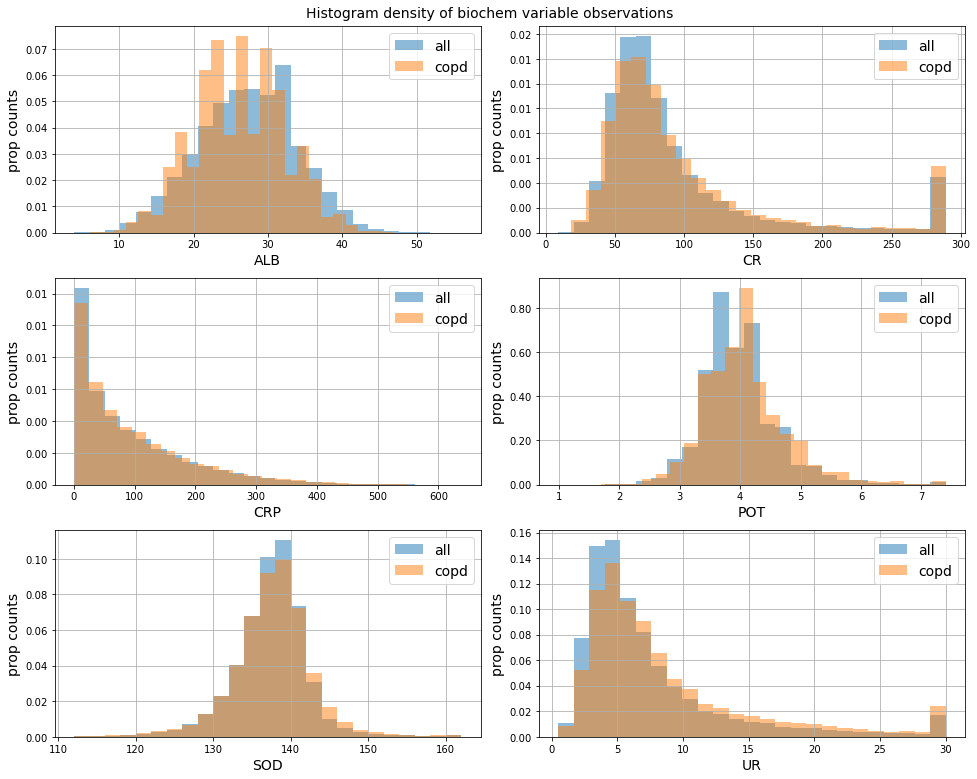

<Figure size 432x288 with 0 Axes>

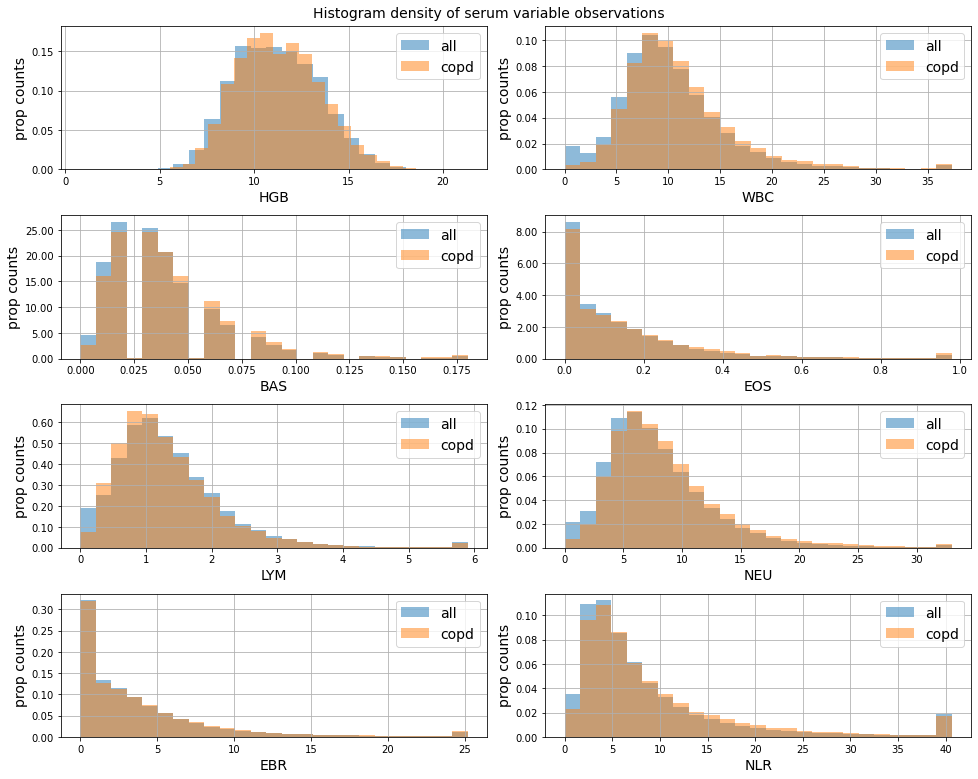

<Figure size 432x288 with 0 Axes>

In [194]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (13.69, 11), sharey = False)
                   
# Plot histograms
data_all.hist(column = vital_signs, ax = ax, bins = 25, alpha = 0.5,
                 label = "all", density = True)
data_copd.hist(column = vital_signs, ax = ax, bins = 25, alpha = 0.5,
                      label = "copd", density = True)

for ax_ in ax.reshape(-1):
    
    # Compute useful things
    ax_.legend(fontsize = 14)
    ax_.set_ylabel("prop counts", fontsize = 14)
    ax_.set_title("")
    ax_.set_xlabel(vital_signs[ax.reshape(-1).tolist().index(ax_)], fontsize = 14)
    ax_.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

    
fig.suptitle("Histogram density of vital sign observations", fontsize = 14)
fig.tight_layout()
plt.show()

plt.savefig(save_vis_folder + "vital_signs_hist.png", facecolor = "white")


# Do the same for biochem variables
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (13.69, 11), sharey = False)
                   
# Plot histograms
data_all.hist(column = biochem_feat, ax = ax, bins = 25, alpha = 0.5,
                 label = "all", density = True)
data_copd.hist(column = biochem_feat, ax = ax, bins = 25, alpha = 0.5,
                      label = "copd", density = True)

for ax_ in ax.reshape(-1):
    
    # Compute useful things
    ax_.legend(fontsize = 14)
    ax_.set_ylabel("prop counts", fontsize = 14)
    ax_.set_title("")
    ax_.set_xlabel(biochem_feat[ax.reshape(-1).tolist().index(ax_)], fontsize = 14)
    ax_.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

    
fig.suptitle("Histogram density of biochem variable observations", fontsize = 14)
fig.tight_layout()
plt.show()

plt.savefig(save_vis_folder + "biochem_variable.png", facecolor = "white")



# Do the same for labs variables
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (13.69, 11), sharey = False)
                   
# Plot histograms
data_all.hist(column = serum_feat, ax = ax, bins = 25, alpha = 0.5,
                 label = "all", density = True)
data_copd.hist(column = serum_feat, ax = ax, bins = 25, alpha = 0.5,
                      label = "copd", density = True)


for ax_ in ax.reshape(-1):
    
    # Compute useful things
    ax_.legend(fontsize = 14)
    ax_.set_ylabel("prop counts", fontsize = 14)
    ax_.set_title("")
    ax_.set_xlabel(serum_feat[ax.reshape(-1).tolist().index(ax_)], fontsize = 14)
    ax_.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

    
fig.suptitle("Histogram density of serum variable observations", fontsize = 14)
fig.tight_layout()
plt.show()

plt.savefig(save_vis_folder + "serum_variable.png", facecolor = "white")


### Plot per patient per group mean trajectories

In [9]:
# Compute trajectories
trajs_all_ = utils._add_time_to_outcome(data_all)
trajs_copd_= utils._add_time_to_outcome(data_copd)


In [20]:
trajs_all_.groupby("time_to_outcome").count()

,subject_id,hadm_id,session_id,hadm_start_time,hadm_end_time,event_time,event_type,charttime,HR,RR,...,SOD,UR,HGB,WBC,BAS,EOS,LYM,NEU,EBR,NLR
time_to_outcome,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,31779,31779,31779,31779,31779,1708,31779,31779,31609,31300,...,1705,1701,1644,1644,1639,1642,1643,1643,1613,1641
0 days 04:00:00,31779,31779,31779,31779,31779,1708,31779,31779,18536,18422,...,3014,3010,2951,2952,2928,2930,2938,2938,2874,2932
0 days 08:00:00,31779,31779,31779,31779,31779,1708,31779,31779,15407,15311,...,1401,1399,1389,1389,1378,1379,1383,1383,1334,1381
0 days 12:00:00,31779,31779,31779,31779,31779,1708,31779,31779,19189,19088,...,766,766,742,742,734,735,737,737,709,736
0 days 16:00:00,31779,31779,31779,31779,31779,1708,31779,31779,21420,21279,...,732,730,692,692,681,682,685,686,662,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229 days 00:00:00,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
229 days 04:00:00,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
229 days 08:00:00,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

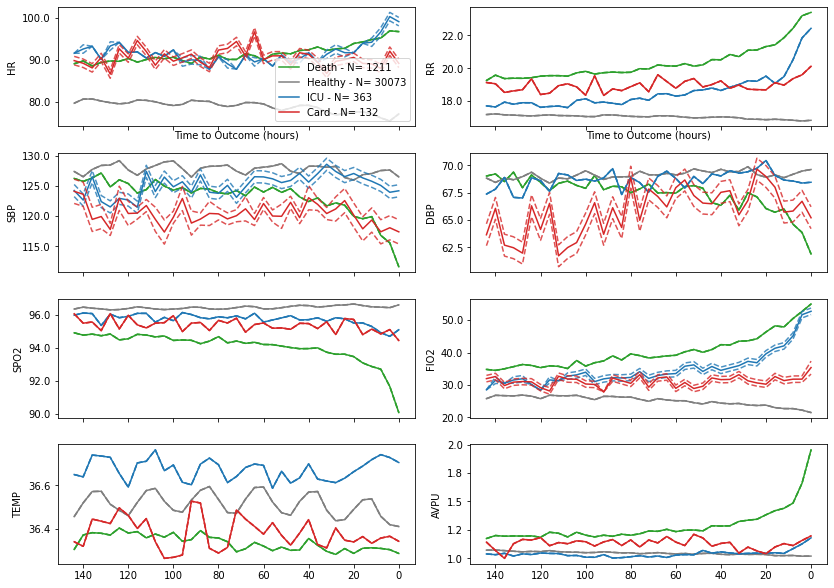

<Figure size 432x288 with 0 Axes>

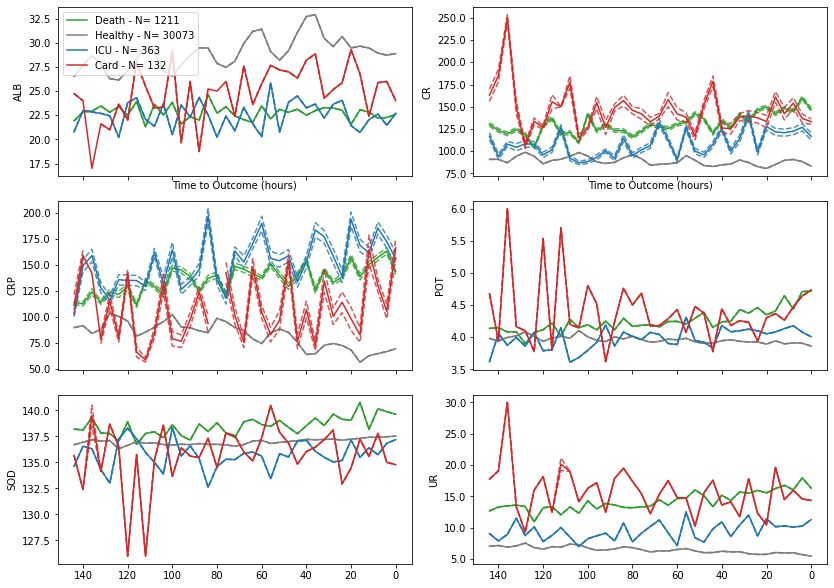

<Figure size 432x288 with 0 Axes>

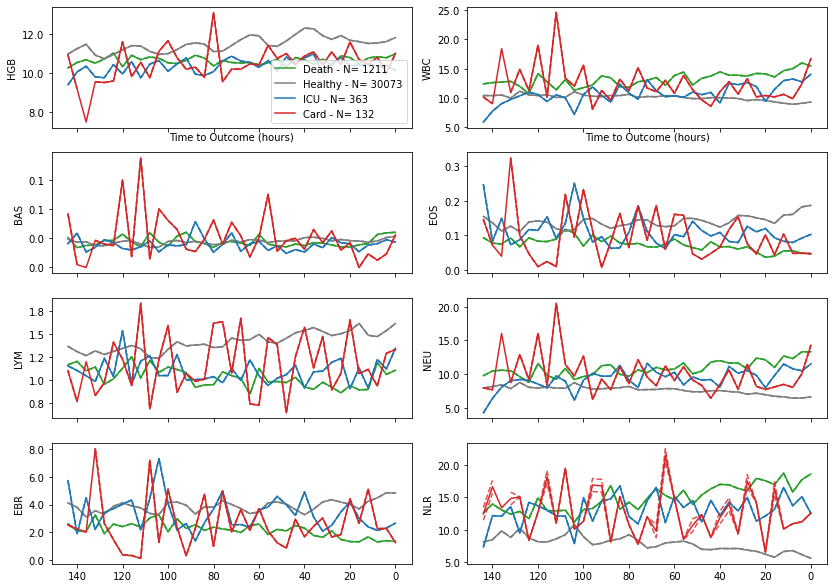

In [32]:
# plot means vitals
fig, ax = utils.plot_means(outcomes_all, obvs_ = trajs_all_, features = vital_signs, max_time = 7)
plt.show()

plt.savefig(save_vis_folder + "vital_signs_means.png", facecolor = "white")

# plot means biochem
fig, ax = utils.plot_means(outcomes_all, obvs_ = trajs_all_, features = biochem_feat, max_time = 7)
plt.show()

plt.savefig(save_vis_folder + "biochem_means.png", facecolor = "white")

# plot means serum
fig, ax = utils.plot_means(outcomes_all, obvs_ = trajs_all_, features = serum_feat, max_time = 7)
plt.show()

plt.savefig(save_vis_folder + "serum_means.png", facecolor = "white")

<Figure size 432x288 with 0 Axes>

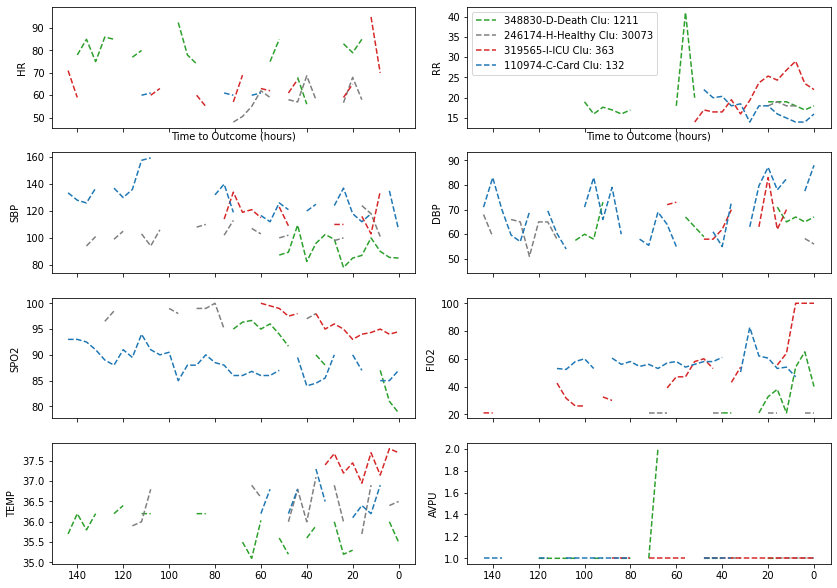

<Figure size 432x288 with 0 Axes>

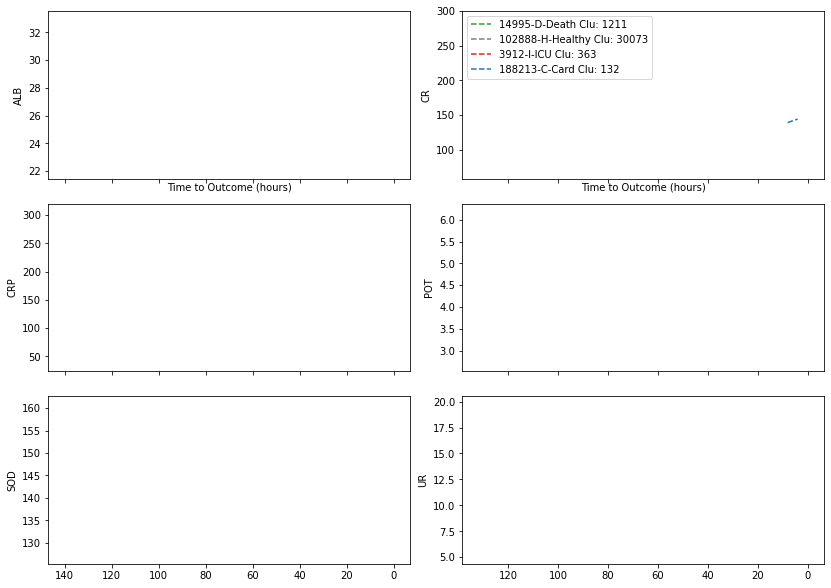

<Figure size 432x288 with 0 Axes>

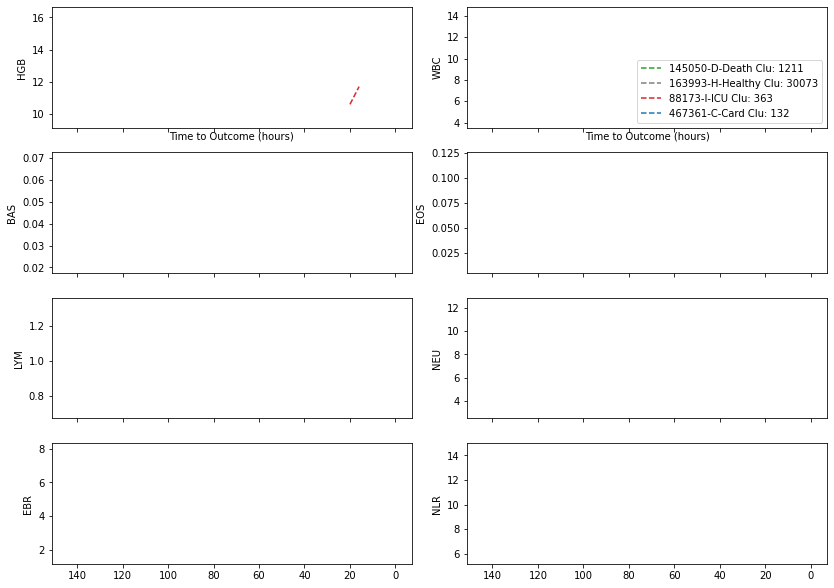

In [44]:
# plot samples vitals
fig, ax = utils.plot_samples(outcomes_all, obvs_ = trajs_all_, features = vital_signs, max_time = 7,num_pats = 1)
plt.show()

plt.savefig(save_vis_folder + "vital_signs_samples.png", facecolor = "white")

# plot samples biochem
fig, ax = utils.plot_samples(outcomes_all, obvs_ = trajs_all_, features = biochem_feat, max_time = 7,num_pats = 1)
plt.show()

plt.savefig(save_vis_folder + "biochem_samples.png", facecolor = "white")

# plot samples serum
fig, ax = utils.plot_samples(outcomes_all, obvs_ = trajs_all_, features = serum_feat, max_time = 7,num_pats = 1)
plt.show()

plt.savefig(save_vis_folder + "serum_samples.png", facecolor = "white")

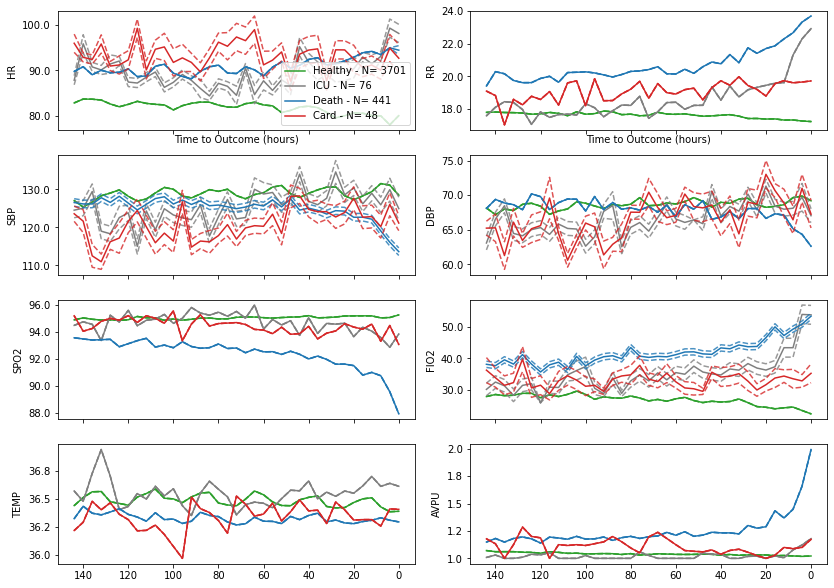

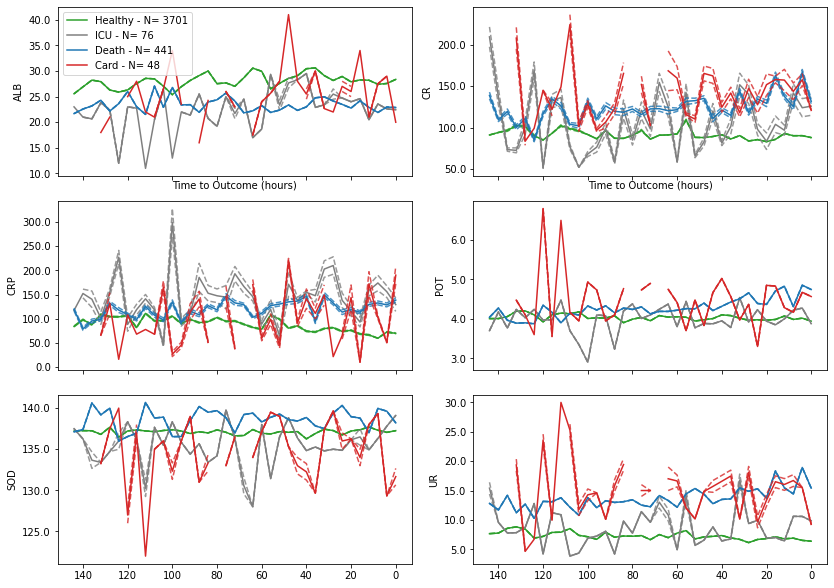

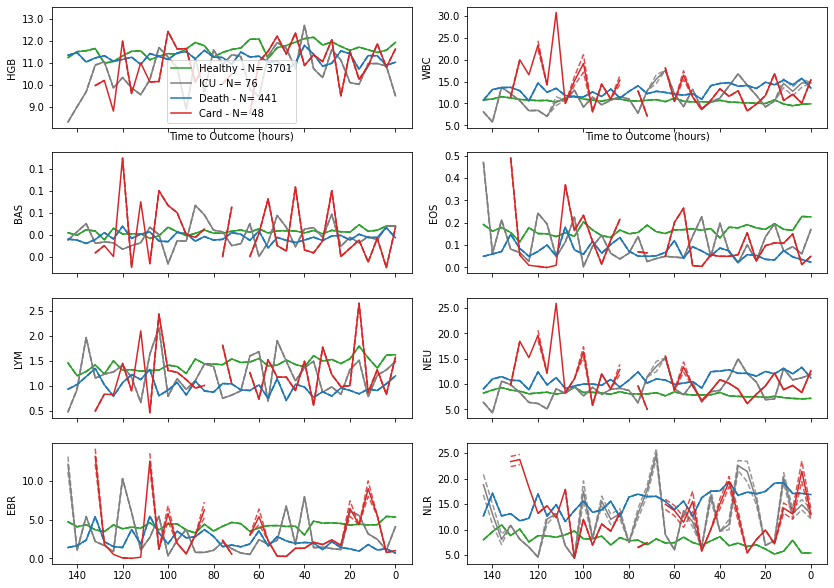

In [47]:
# FOR COPD

# plot means vitals
fig, ax = utils.plot_means(outcomes_copd, obvs_ = trajs_copd_, features = vital_signs, max_time = 7)
plt.show()

fig.savefig(save_vis_folder + "vital_signs_means_copd.png")

# plot means biochem
fig, ax = utils.plot_means(outcomes_copd, obvs_ = trajs_copd_, features = biochem_feat, max_time = 7)
plt.show()

fig.savefig(save_vis_folder + "biochem_means_copd.png", facecolor = "white")

# plot means serum
fig, ax = utils.plot_means(outcomes_copd, obvs_ = trajs_copd_, features = serum_feat, max_time = 7)
plt.show()

fig.savefig(save_vis_folder + "serum_means_copd.png")

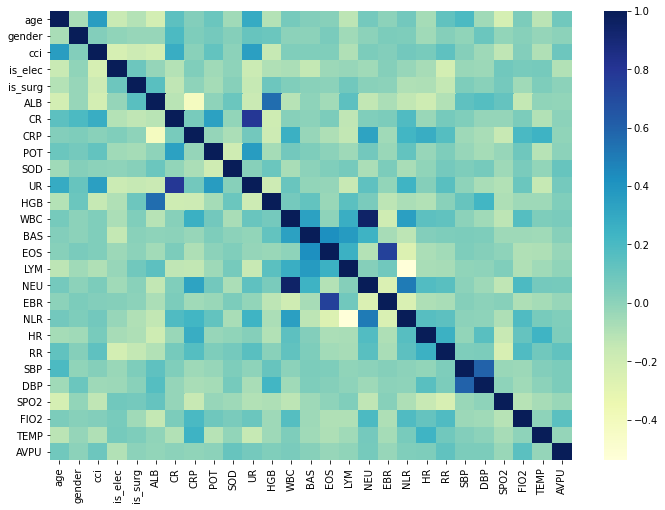

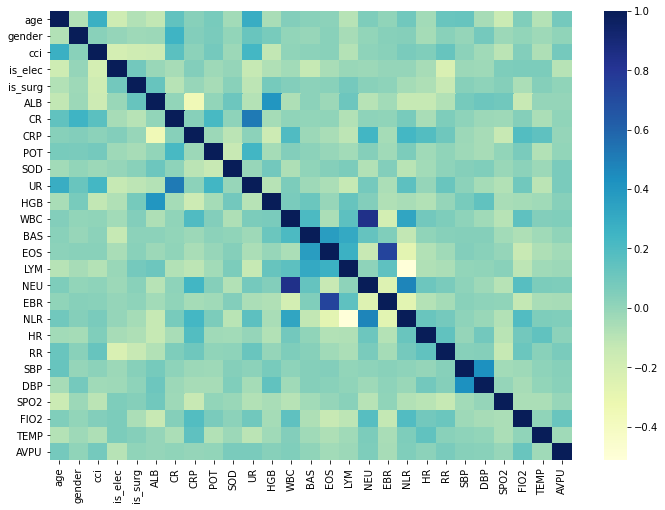

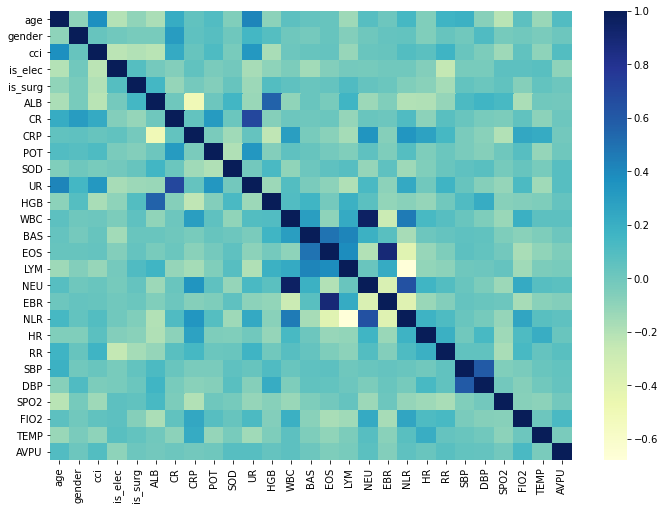

In [246]:
# Compute correlation for trajectories
static_feats = ['age', 'gender', 'cci', 'is_elec', 'is_surg']
total_feats  = static_feats + biochem_feat + serum_feat + vital_signs

pearson_ = data_all[total_feats].corr(method = 'pearson')
kendall_ = data_all[total_feats].corr(method = "kendall")
spearman_ = data_all[total_feats].corr(method = "spearman")

fig, ax = plt.subplots(figsize = (11.69, 8.27))
sns.heatmap(pearson_, ax = ax, cmap="YlGnBu")
plt.savefig(save_vis_folder + 'pearson_corr.png')

fig, ax = plt.subplots(figsize = (11.69, 8.27))
sns.heatmap(kendall_, ax = ax, cmap="YlGnBu")
plt.savefig(save_vis_folder + 'kendall_corr.png')

fig, ax = plt.subplots(figsize = (11.69, 8.27))
sns.heatmap(spearman_, ax = ax, cmap="YlGnBu")
plt.savefig(save_vis_folder + 'spearman_corr.png')

In [40]:
outcomes_all

,Card,Death,Healthy,ICU
subject_id,,,,
29,0,1,0,0
44,0,0,1,0
60,0,0,1,0
71,0,0,1,0
73,0,0,1,0
...,...,...,...,...
473914,0,0,1,0
473926,0,0,1,0
473927,0,0,1,0


# Compute correlation with outcome or with different conditions for time series

In [68]:
sys.path.append('/home/ds.ccrg.kadooriecentre.org/henrique.aguiar/Desktop/COPD/benchmark-project/ac-tpc-main/src/models/ac-tpc-og/')

In [69]:
from main import run_actpc


IndentationError: unindent does not match any outer indentation level (main.py, line 226)

In [67]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
